In [1]:
import pandas as pd
import numpy as np

URL1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'

In [3]:
df = pd.read_csv(URL1)

In [4]:
pd.set_option("display.max.columns", None)

In [7]:
df.head()
#The default number of rows displayed by .head() is five

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
%matplotlib inline

<AxesSubplot:xlabel='Rank'>

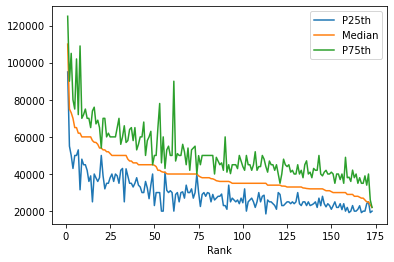

In [12]:
# does the median income decrease or increase between p25th and p75th as rank?
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
#The median income decreases as rank decreases

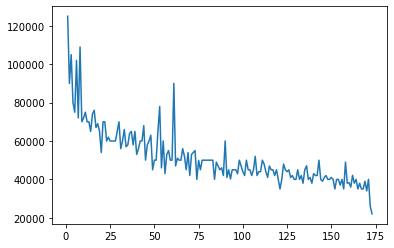

In [11]:
import matplotlib.pyplot as plt
plt.plot(df["Rank"], df["P75th"])

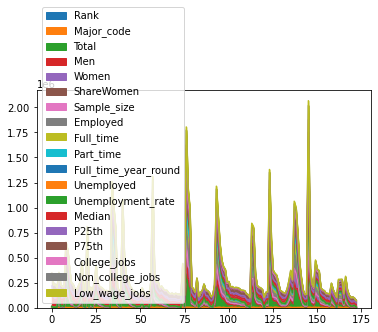

In [13]:
ax = df.plot.area()

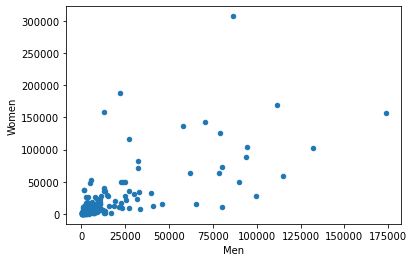

In [23]:
ax1 = df.plot.scatter(x='Men',
                      y='Women')

In [24]:
top_5 = df.sort_values(by="Median", ascending=False).head()

<AxesSubplot:xlabel='Major'>

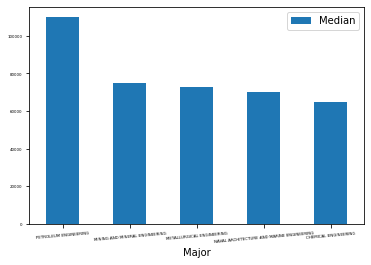

In [26]:
#what are top five majors paid most in mdeian?
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

In [28]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

<AxesSubplot:xlabel='Major'>

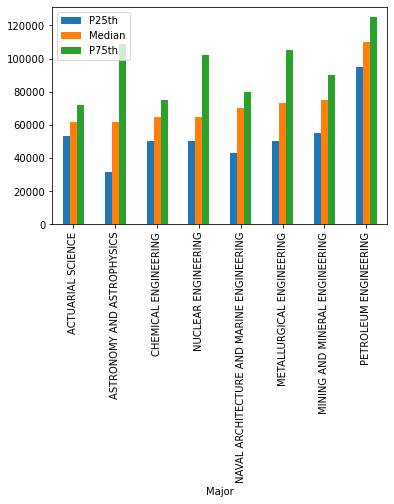

In [29]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

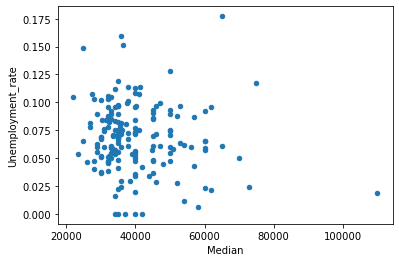

In [30]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

In [33]:
# Which major is most popular??
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

C:\Users\dltpd\AppData\Local\Temp\ipykernel_8432\2810852487.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_cat_totals = big_cat_totals.append(small_sums)


<AxesSubplot:>

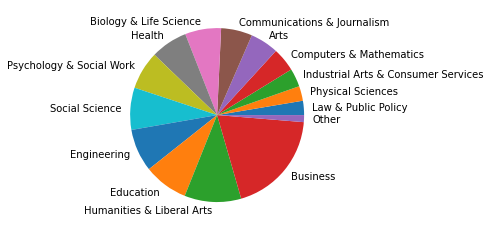

In [34]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)

big_cat_totals.plot(kind="pie", label="")

In [36]:
URL2 = 'https://raw.githubusercontent.com/StephenFordham/data_training/master/Tennis_World_Number_1s.csv'
from urllib.request import urlretrieve
urlretrieve(URL2,'world-tennis-rank.csv')

data = pd.read_csv('world-tennis-rank.csv ', parse_dates=True)
data.head(5) 

,Tennis_Player,Total_Weeks_at_No_1,Maximum_Consectutive_Weeks_at_no_1,Years_End_no_1,Careers_Wins_Losses,Titles,Prize_Money,Unnamed: 7
0,Roger Federer,310,237,5,1222-265,102,126266005,NaN
1,Pete Sampras,286,102,6,762-222,64,43280489,NaN
2,Ivan Lendl,270,157,4,1068-242,94,21262417,NaN
3,Jimmy Connors,268,160,5,1274-282,109,8641040,NaN
4,Novak Djokovic,264,122,5,871-182,75,134684000,NaN


<AxesSubplot:>

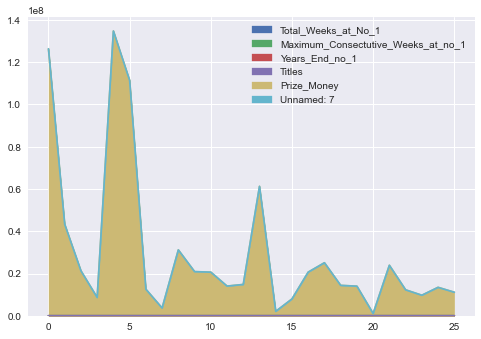

In [37]:
plt.style.use('seaborn')

data.plot.area()

In [44]:
top_5 = data.sort_values(by="Prize_Money", ascending=False).head()

In [45]:
top_5

,Tennis_Player,Total_Weeks_at_No_1,Maximum_Consectutive_Weeks_at_no_1,Years_End_no_1,Careers_Wins_Losses,Titles,Prize_Money,Unnamed: 7
4,Novak Djokovic,264,122,5,871-182,75,134684000,NaN
0,Roger Federer,310,237,5,1222-265,102,126266005,NaN
5,Rafael Nadal,196,56,4,960-196,83,111328858,NaN
13,Andy Murray,41,41,1,663-191,45,61217017,NaN
1,Pete Sampras,286,102,6,762-222,64,43280489,NaN


In [46]:
data.drop('Unnamed: 7', axis=1, inplace = True)# drop the unnamed one

In [47]:
data[['Wins','Losses']] = data.Careers_Wins_Losses.str.split('-', expand=True).astype(float)

In [48]:
data[['Tennis_Player','Wins','Losses']].head()

,Tennis_Player,Wins,Losses
0,Roger Federer,1222.0,265.0
1,Pete Sampras,762.0,222.0
2,Ivan Lendl,1068.0,242.0
3,Jimmy Connors,1274.0,282.0
4,Novak Djokovic,871.0,182.0


In [49]:
# who has most high win percentage in their career game
data['Total_Professional_matches'] = data.Wins + data.Losses

data['Win_Percentage'] = (data.Wins / data.Total_Professional_matches) * 100

data[['Tennis_Player', 'Total_Professional_matches', 'Win_Percentage']].sort_values('Win_Percentage', ascending=False).head(10)

,Tennis_Player,Total_Professional_matches,Win_Percentage
5,Rafael Nadal,1156.0,83.044983
4,Novak Djokovic,1053.0,82.716049
7,Bjorn Borg,779.0,82.670090
0,Roger Federer,1487.0,82.178884
3,Jimmy Connors,1556.0,81.876607
6,John McEnroe,1079.0,81.649676
2,Ivan Lendl,1310.0,81.526718
13,Andy Murray,854.0,77.634660
1,Pete Sampras,984.0,77.439024
17,Boris Becker,927.0,76.914779


In [50]:
#who keep year end no1 most? if the number is tied compare to win percentage 
data[['Tennis_Player', 'Years_End_no_1', 'Win_Percentage']].sort_values(['Years_End_no_1','Win_Percentage'], ascending=False).head(10)

,Tennis_Player,Years_End_no_1,Win_Percentage
1,Pete Sampras,6,77.439024
4,Novak Djokovic,5,82.716049
0,Roger Federer,5,82.178884
3,Jimmy Connors,5,81.876607
5,Rafael Nadal,4,83.044983
6,John McEnroe,4,81.649676
2,Ivan Lendl,4,81.526718
7,Bjorn Borg,2,82.670090
10,Stefan Edberg,2,74.789916
9,Lleyton Hewitt,2,70.159453


<AxesSubplot:ylabel='Tennis_Player'>

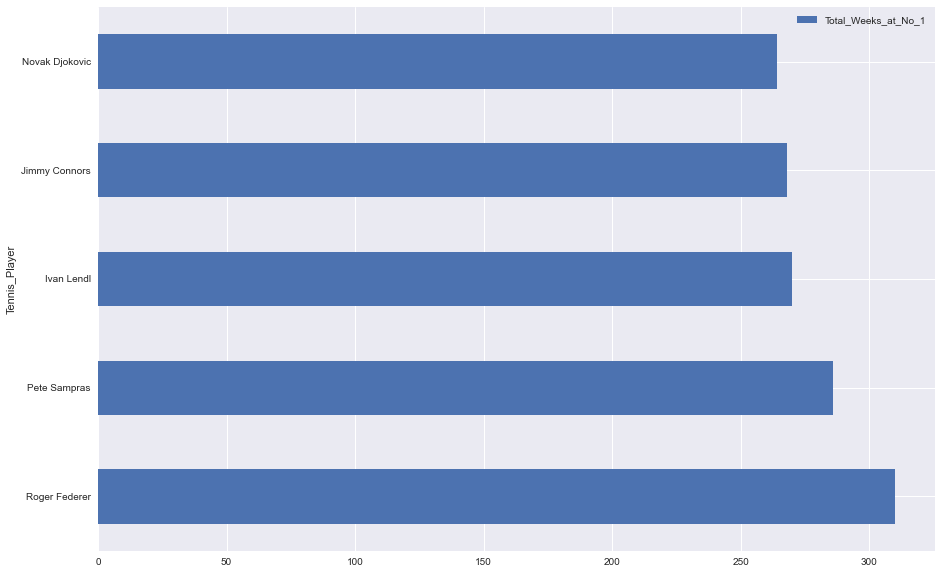

In [56]:
# who keep no1 longgest weekly?
data[data.Total_Weeks_at_No_1 > 200].plot.barh(x='Tennis_Player', 
                                              y= 'Total_Weeks_at_No_1',
                                              figsize = (15, 10),)

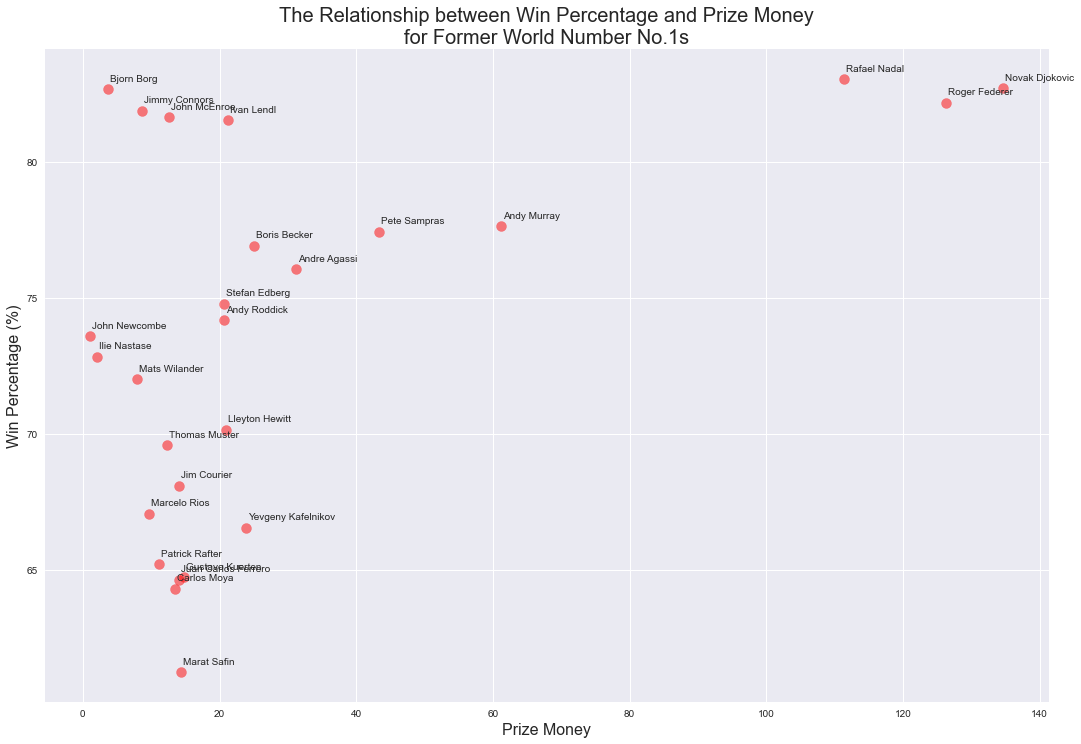

In [57]:
data['Earnings'] = Tennis_Win_Perc.Prize_Money / 10**6

tennis_players = list(data.Tennis_Player)
x_coords = list(data.Earnings)
y_coords = list(data.Win_Percentage)

plt.figure(figsize=(18, 12))

for i, player in enumerate(tennis_players):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red', alpha=0.5, s=100)
    
    plt.text(x+0.3, y+0.3, player, fontsize=10)
    

plt.title('The Relationship between Win Percentage and Prize Money\nfor Former World Number No.1s', fontsize=20)
plt.ylabel('Win Percentage (%)', fontsize=16)
plt.xlabel('Prize Money', fontsize=16)
plt.show()

In [59]:
data.drop

<bound method DataFrame.drop of           Tennis_Player  Total_Weeks_at_No_1  \
0         Roger Federer                  310   
1          Pete Sampras                  286   
2            Ivan Lendl                  270   
3         Jimmy Connors                  268   
4        Novak Djokovic                  264   
5          Rafael Nadal                  196   
6          John McEnroe                  170   
7            Bjorn Borg                  109   
8          Andre Agassi                  101   
9        Lleyton Hewitt                   80   
10        Stefan Edberg                   72   
11          Jim Courier                   58   
12      Gustavo Kuerten                   43   
13          Andy Murray                   41   
14         Ilie Nastase                   40   
15        Mats Wilander                   20   
16         Andy Roddick                   13   
17         Boris Becker                   12   
18          Marat Safin                    9   
19  Juan

In [60]:
df.drop

<bound method DataFrame.drop of      Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_cate

In [61]:
data

,Tennis_Player,Total_Weeks_at_No_1,Maximum_Consectutive_Weeks_at_no_1,Years_End_no_1,Careers_Wins_Losses,Titles,Prize_Money,Wins,Losses,Total_Professional_matches,Win_Percentage,Earnings
0,Roger Federer,310,237,5,1222-265,102,126266005,1222.0,265.0,1487.0,82.178884,126.266005
1,Pete Sampras,286,102,6,762-222,64,43280489,762.0,222.0,984.0,77.439024,43.280489
2,Ivan Lendl,270,157,4,1068-242,94,21262417,1068.0,242.0,1310.0,81.526718,21.262417
3,Jimmy Connors,268,160,5,1274-282,109,8641040,1274.0,282.0,1556.0,81.876607,8.641040
4,Novak Djokovic,264,122,5,871-182,75,134684000,871.0,182.0,1053.0,82.716049,134.684000
5,Rafael Nadal,196,56,4,960-196,83,111328858,960.0,196.0,1156.0,83.044983,111.328858
6,John McEnroe,170,58,4,881-198,77,12552132,881.0,198.0,1079.0,81.649676,12.552132
7,Bjorn Borg,109,46,2,644-135,64,3655751,644.0,135.0,779.0,82.670090,3.655751
8,Andre Agassi,101,52,1,870-274,60,31152975,870.0,274.0,1144.0,76.048951,31.152975
9,Lleyton Hewitt,80,75,2,616-262,30,20879934,616.0,262.0,878.0,70.159453,20.879934


In [62]:
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
